<h1>
  <span style="color:#0B5ED7; font-weight:800;">
    Telecom Customer Insights
  </span>
</h1>


**Objective:**

This project focuses on exploratory data analysis of a telecom customer dataset to investigate customer churn behavior. The analysis aims to identify key demographic, service usage, and billing-related factors that contribute to customer attrition. Insights derived from this analysis can inform targeted retention strategies.

### **Import Libraries**

In [1]:
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations and arrays
import matplotlib.pyplot as plt  # Data visualization (basic plots)
import seaborn as sns             # Statistical data visualization


### **Load Data**

In [2]:
df = pd.read_csv("C:/Users/Owner/Desktop/Portfolio/Python Project/Telecom churn/Telco-Customer-Churn.csv")

### **Inspect Data**

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print(df.tail())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

In [5]:
print("Columns:", df.columns)

Columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
print("Shape:", df.shape)

Shape: (7043, 21)


### **Initial Data Overview**

- The dataset contains customer demographic, service usage, and billing information relevant to churn analysis.

- Each observation represents a unique customer, identified by the customerID column.

- The data includes a mix of categorical variables (e.g. contract type, services subscribed) and numerical variables (e.g. tenure, monthly charges).

- The overall structure of the dataset appears well-formed, with clearly defined features and an explicit churn target variable, making it suitable for exploratory data analysis.

In [7]:
print(df.describe().T)

                 count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75  


### **Numerical Feature Summary** 

- The dataset contains 7,043 customers, with complete numerical records for SeniorCitizen, tenure, and MonthlyCharges.

- Tenure ranges from 0 to 72 months, with a mean of 32.37 months and a median of 29 months, indicating that a large portion of customers have relatively short to mid-term relationships with the service provider.

- The interquartile range for tenure (9 to 55 months) shows high variability in customer longevity.

- Monthly charges span from 18.25 to 118.75, with a mean of 64.76 and a median of 70.35, suggesting a slight left skew, where a subset of customers pay lower monthly fees.

- The wide standard deviation in monthly charges (30.09) reflects diverse pricing plans and service combinations.

- SeniorCitizen is a binary feature, with a mean of 0.16, indicating that approximately 16% of customers are senior citizens.

In [8]:
df.duplicated().any()


np.False_

In [9]:
df.isnull().any()


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### **Data Quality Checks**

- No duplicate records were detected in the dataset.
- Missing values were assessed across all variables and none were present.
- The dataset shows minimal issues related to missing or duplicate data, allowing analysis to proceed without significant data loss.


In [10]:
df["Churn"].value_counts()
df["Churn"].value_counts(normalize=True) * 100


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

### **Target Variable Distribution (Churn)**

- The dataset shows that 73.46% of customers did not churn, while 26.54% of customers did churn.

- This indicates a moderate class imbalance, with non-churned customers forming the majority class.

- Although churn is not the dominant outcome, more than one in four customers leaving the service represents a material business concern.

- The imbalance highlights the importance of examining how customer demographics, service usage, and billing characteristics differ between churned and non-churned customers.

In [11]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
target = "Churn"
id_col = "customerID"

cat_cols = df.select_dtypes(include="object").columns.drop([target, id_col])
num_cols = df.select_dtypes(exclude="object").columns


In [13]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### **Feature Categorisation**

- Variables were classified into numerical and categorical features to support systematic analysis.
- Numerical features capture customer behaviour and billing amounts.
- Categorical features describe customer demographics, services, and contract types.
- This separation enables structured univariate and bivariate analysis.


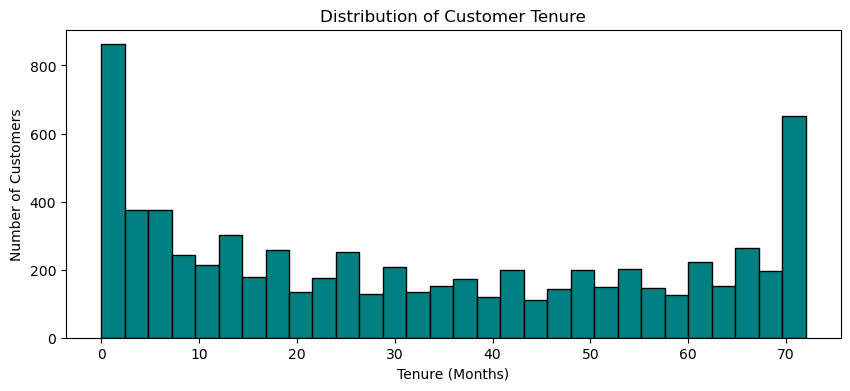

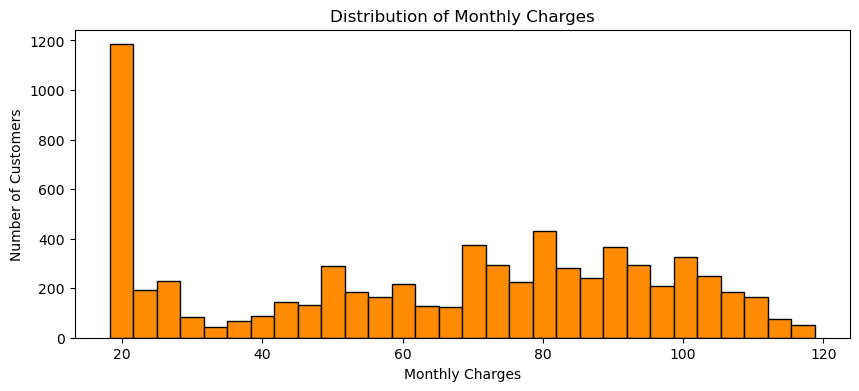

In [14]:
plt.figure(figsize=(10, 4))

# Tenure distribution
plt.hist(df["tenure"], bins=30, color="teal", edgecolor="black")
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

# Monthly Charges distribution
plt.figure(figsize=(10, 4))
plt.hist(df["MonthlyCharges"], bins=30, color="darkorange", edgecolor="black")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()


###  **Distribution of Numerical Variables**

- Customer tenure is concentrated at lower values, with a noticeable peak among customers with short service durations, indicating a large proportion of relatively new customers.

- The distribution of tenure tapers off toward higher values, suggesting fewer long-tenured customers.

- Monthly charges display a wide spread across the range, indicating substantial variation in pricing plans and service bundles.

- The observed distributions highlight meaningful variation in customer tenure and billing amounts, which may be relevant when analyzing churn patterns in later sections.

In [15]:
df["Contract"].value_counts()
df["PaymentMethod"].value_counts()


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

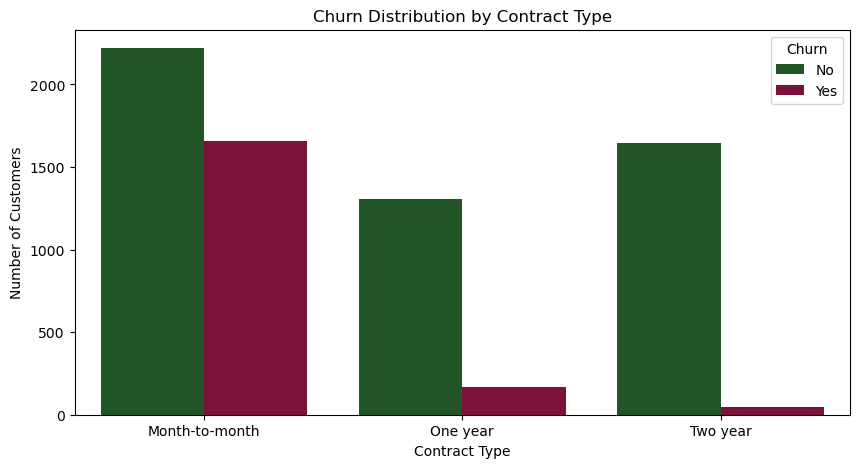

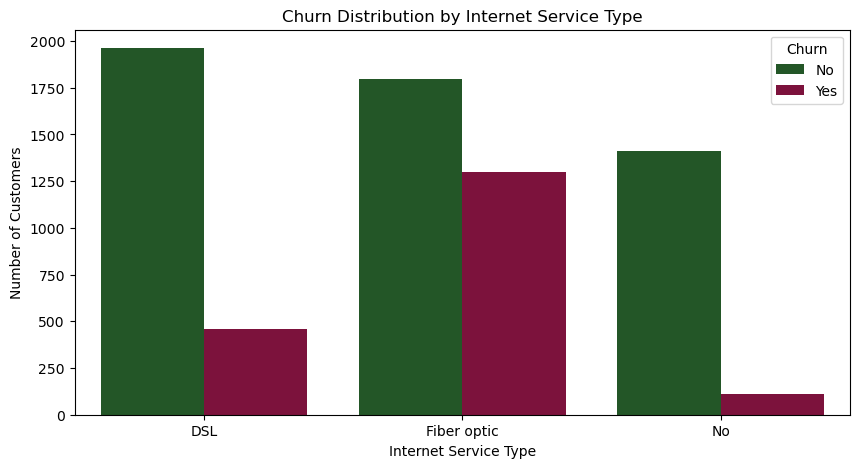

In [16]:
palette = ["#1B5E20", "#8E0038"]  # Dark green & wine

plt.figure(figsize=(10, 5))
sns.countplot(x="Contract", hue="Churn", data=df, palette=palette)
plt.title("Churn Distribution by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x="InternetService", hue="Churn", data=df, palette=palette)
plt.title("Churn Distribution by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()



### **Distribution of Categorical Variables**

- Month-to-month contracts are the most common contract type and exhibit a noticeably higher number of churned customers compared to longer-term contracts.

- One-year and two-year contracts show substantially lower churn counts, suggesting that longer contract commitments are associated with improved customer retention.

- Customers using Fiber optic internet service display a higher number of churn cases compared to DSL users.

- Customers without internet service show minimal churn, indicating lower attrition within this group.

- Overall, contract type and internet service appear to be important categorical factors associated with churn behaviour.

C:\Users\Owner\AppData\Local\Temp\ipykernel_9744\1017713892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


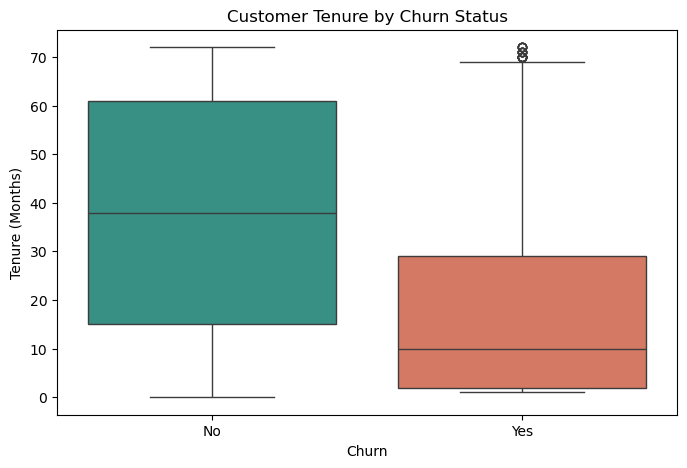

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Churn",
    y="tenure",
    data=df,
    palette=["#2A9D8F", "#E76F51"]  
)
plt.title("Customer Tenure by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_9744\1818105438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


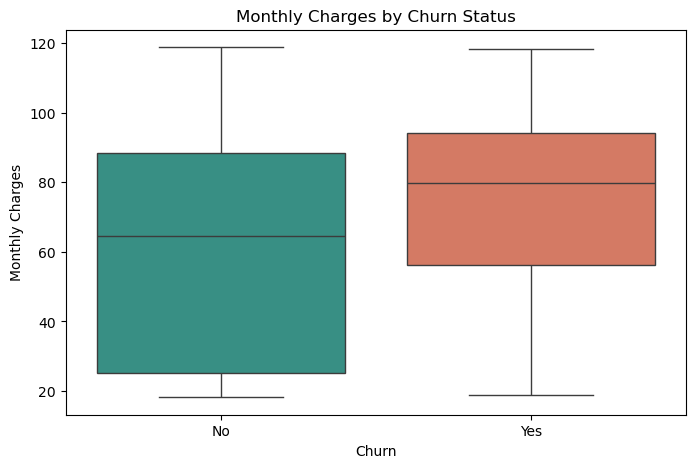

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Churn",
    y="MonthlyCharges",
    data=df,
    palette=["#2A9D8F", "#E76F51"]  
)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


###  **Churn vs Tenure and Monthly Charges**

- Customers who churned exhibit a substantially shorter tenure compared to customers who did not churn, indicating that churn is more common among newer customers.

- The median tenure for churned customers is noticeably lower, with a tighter distribution concentrated at lower tenure values.

- Monthly charges for churned customers tend to be higher on average than for non-churned customers, suggesting that pricing levels may be associated with churn behavior.

- These patterns indicate that early-stage customers and those facing higher monthly costs are more frequently represented among churned customers.


In [19]:
df[num_cols].corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


### **Correlation Analysis**

- Tenure and MonthlyCharges show a weak positive correlation (0.25), indicating that customers with longer tenure tend to have slightly higher monthly charges.

- SeniorCitizen and MonthlyCharges exhibit a weak positive relationship (0.22), suggesting that senior citizens may be associated with marginally higher monthly charges.

- SeniorCitizen and tenure show almost no correlation (0.02), indicating that customer age category is largely independent of length of service.

- Overall, the correlations between numerical features are low to moderate, suggesting limited multicollinearity among these variables.


### **Key Insights & Business Implications**

- Customer churn is concentrated among customers with short tenure, highlighting the importance of early-stage retention efforts.

- Month-to-month contracts exhibit substantially higher churn compared to longer-term contracts, suggesting contract structure plays a key role in retention.

- Customers with higher monthly charges are more frequently represented among churned customers, indicating potential price sensitivity.

- Fiber optic internet users show higher churn counts relative to other internet service types.

- Longer contract commitments and lower pricing exposure appear to be associated with improved customer retention.

- These insights can inform targeted retention strategies focused on onboarding experience, pricing optimisation, and contract incentives.

